In [ ]:
!pip install plotly

In [ ]:
# biblotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upload do arquivo
Base_Dados = pd.read_excel('BaseDados_RegressaoLinear.xlsx', 'Plan1')
Base_Dados

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000
...,...,...
94,3185.629581,7279.937858
95,3217.485877,7315.799621
96,3249.660736,7351.661384
97,3282.157343,7387.523147


In [ ]:
# Os cinco primeiros registros
Base_Dados.head()

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000


In [ ]:
# Os cinco últimos registros
Base_Dados.tail()

,Salario,Limite_Emprestimo
94,3185.629581,7279.937858
95,3217.485877,7315.799621
96,3249.660736,7351.661384
97,3282.157343,7387.523147
98,3314.978916,7423.384910


In [ ]:
# Colunas, quantidade de valores e formato do campo
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            99 non-null     float64
 1   Limite_Emprestimo  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
# Visualização da tabela estatística
Base_Dados.describe()

,Salario,Limite_Emprestimo
count,99.000000,99.000000
mean,2119.100581,4900.652060
std,600.832983,1378.113961
min,1250.219130,2900.124323
25%,1595.383780,3700.800280
50%,2035.792243,4722.412623
75%,2597.840528,6026.191986
max,3314.978916,7423.384910


In [ ]:
# Converter para um Array
Eixo_x = Base_Dados.iloc[:,0].values
Eixo_y = Base_Dados.iloc[:,1].values

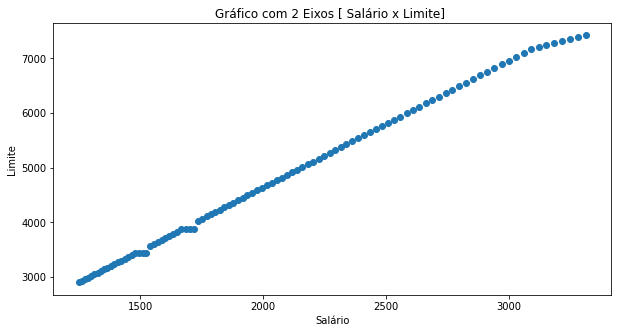

In [ ]:
# Primeira análise gráfica
plt.figure( figsize=(10,5))
plt.scatter( Eixo_x, Eixo_y);
plt.title('Gráfico com 2 Eixos [ Salário x Limite] ')
plt.xlabel('Salário')
plt.ylabel('Limite');

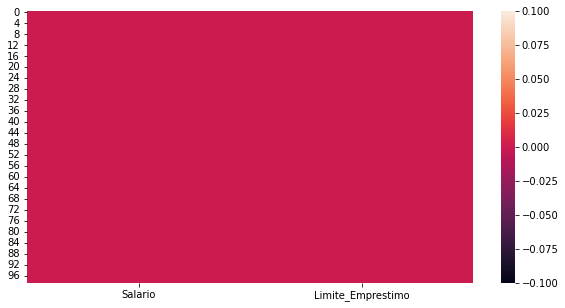

In [ ]:
# Gráfico com Seaborn
plt.figure( figsize=(10,5) )
sns.heatmap( Base_Dados.isnull() );

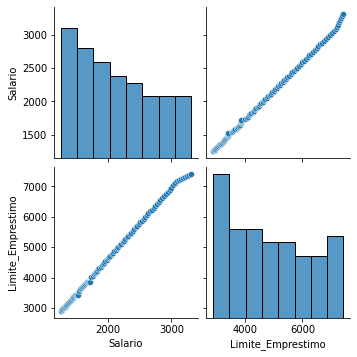

In [ ]:
# Gráfico pairplot, esse gráfico utiliza bastante poder computacional, então dependendo da base de dados, pode demorar pra rodar.
# Ele pega a base de dados e faz um gráfico de dois eixos pra todas as variaveis da nossa base.
sns.pairplot( Base_Dados );

In [ ]:
Correlação = np.corrcoef( Eixo_x, Eixo_y )
Correlação

array([[1.        , 0.99949773],
       [0.99949773, 1.        ]])

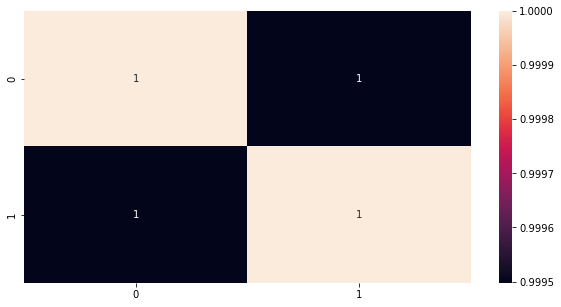

In [ ]:
# Visuzalição da correlação
plt.figure( figsize=(10,5) )
sns.heatmap(Correlação, annot=True );

In [ ]:
# Modelo - Covertendo os dados para um formato de matriz
Eixo_x = Eixo_x.reshape(-1, 1)
Eixo_y = Eixo_y.reshape(-1, 1)

In [ ]:
# Modelo - Dados de treino e teste
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(
    Eixo_x,
    Eixo_y,
    test_size=0.20
)

In [ ]:
# Conferindo
print (len(x_treinamento ), len(x_teste) )

79 20


In [ ]:
# Importação do modelo - Função da regressão linear
# Modelo aprendendo como o salário interfere no nosso limite de empréstimo
from sklearn.linear_model import LinearRegression

Funcao_Regressao = LinearRegression()

Funcao_Regressao.fit( x_treinamento, y_treinamento )

LinearRegression()

In [ ]:
Funcao_Regressao.score( x_treinamento, y_treinamento )

0.9992270206046051

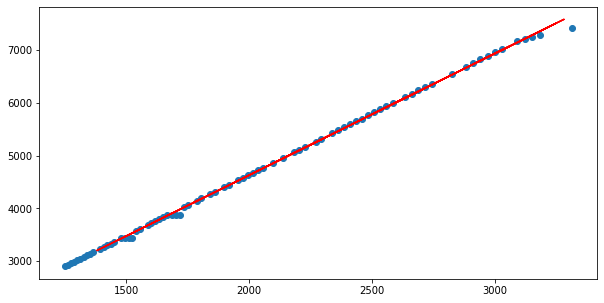

In [ ]:
# Gráfico com 2 Eixos salário e limite
# Predict fazendo revisão dos valores
plt.figure( figsize=(10,5) )
plt.scatter( x_treinamento, y_treinamento )
plt.plot( x_teste, Funcao_Regressao.predict(x_teste), color='red' );

In [ ]:
# Avaliando erros 
Previsoes = Funcao_Regressao.predict( x_teste )

from sklearn import metrics
print('RMSE', np.sqrt( metrics.mean_squared_error( y_teste, Previsoes) ) )

RMSE 64.15069927775033


In [ ]:
# Limite de empréstimo com previsões
print( Funcao_Regressao.predict( [[5600]] ) )

[[12929.76140917]]
